# Testing Decoding Non-Stationary SSPs

The purpose of this notebook is to test/demonstrate decoding from non-stationary SSPs.

We will use a simple MLP to decode, instead of attempting exact decoding solutions. Mainly for speed, but also for laziness in determining the exact kernel (or it's envelope) for decoding.


In [1]:
import numpy as np

from ssp_bayes_opt import sspspace, nonstationary_sspspace
import polygons

import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2022-09-21 17:43:55.838436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 17:43:55.838465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def make_hex_space(domain_dim=2, ls=1, bounds = np.array([[-1,1],[-1,1]])):
    ssp_space = sspspace.HexagonalSSPSpace(
                    domain_dim,
                    ssp_dim=151, 
                    scale_min=0.5, 
                    scale_max=8, 
                    domain_bounds=bounds, 
                    length_scale=ls)
    return ssp_space

def make_regions(ssp_space, bounds=np.array([[-1,1],[-1,1]])):
    
    ax_scale = (bounds[:,1]-bounds[:,0])/2
    pts = [
            [(0.,0.),(0.5*ax_scale[0],-0.25*ax_scale[1]), (0,-0.5*ax_scale[1]), (-0.5*ax_scale[0], -0.25*ax_scale[1]),(-0.5*ax_scale[0],0.5*ax_scale[1])],
    ]

    num_edges_children = 4
    num_nodes_children = 4
    tree = polygons.build_search_tree(pts,
                                      num_edges_children,
                                      num_nodes_children)

    def m1(xs, t=tree):
        ps = list(map(tuple, xs))
        return np.array(polygons.points_are_inside(t,ps))

    def m2(xs, t=tree):
        ps = list(map(tuple, xs))
        return np.logical_not(np.array(polygons.points_are_inside(t,ps)))

    memberships = [lambda x: m1(x), lambda x: m2(x)]

    # MLP region gets better results.
    rs = nonstationary_sspspace.MLPRegion(
                bounds=bounds,
                memberships=memberships,
                encoder=ssp_space)
    return rs

ssp_space = make_hex_space(bounds = np.array([[-10,10],[-10,10]]))
ssp_space.update_lengthscale(0.1)

regions = make_regions(ssp_space)


nonstationary_space = nonstationary_sspspace.NonstationarySSPSpace(ssp_space, regions)

/home/furlong/projects/cnrg/ssp-bayesopt/ssp_bayes_opt/util.py:11: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  u_sample_points = sampler.random(num_points)
2022-09-21 17:46:08.773573: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-21 17:46:08.773623: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 17:46:08.773644: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hubel): /proc/driver/nvidia/version does not exist
2022-09-21 17:46:08.773884: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable th

Epoch 1/200
80/80 [==============================] - 1s 3ms/step - loss: 0.0936 - val_loss: 0.0242
Epoch 2/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.0107
Epoch 3/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0069
Epoch 4/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 7/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 8/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 9/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 10/200
80/80 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 11/

2022-09-21 17:46:34.937462: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 386560000 exceeds 10% of free system memory.
2022-09-21 17:47:01.384800: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 309248000 exceeds 10% of free system memory.


Epoch 1/200
7986/8000 [============================>.] - ETA: 0s - loss: 16.6904

2022-09-21 17:47:16.611476: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 77312000 exceeds 10% of free system memory.


8000/8000 [==============================] - 16s 2ms/step - loss: 16.6637 - val_loss: 1.5321
Epoch 2/200
8000/8000 [==============================] - 15s 2ms/step - loss: 0.7540 - val_loss: 0.4411
Epoch 3/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.3564 - val_loss: 0.2867
Epoch 4/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2775 - val_loss: 0.2641
Epoch 5/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2426 - val_loss: 0.2242
Epoch 6/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2218 - val_loss: 0.2104
Epoch 7/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.2072 - val_loss: 0.2184
Epoch 8/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.1975 - val_loss: 0.1899
Epoch 9/200
8000/8000 [==============================] - 16s 2ms/step - loss: 0.1885 - val_loss: 0.1724
Epoch 10/200
8000/8000 [==============================] - 16s 2ms/step - lo

8000/8000 [==============================] - 12s 2ms/step - loss: 0.0875 - val_loss: 0.0895
Epoch 157/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0871 - val_loss: 0.0907
Epoch 158/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0869 - val_loss: 0.0896
Epoch 159/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0870 - val_loss: 0.0898
Epoch 160/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0868 - val_loss: 0.0871
Epoch 161/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0868 - val_loss: 0.0882
Epoch 162/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0868 - val_loss: 0.0874
Epoch 163/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0864 - val_loss: 0.0888
Epoch 164/200
8000/8000 [==============================] - 12s 2ms/step - loss: 0.0866 - val_loss: 0.0931
Epoch 165/200
8000/8000 [==============================] - 1

## Make a Dataset

Next, we will construct a number of samples of the domain, encode them as non-stationary SSPs and then decode.

We will also create a test set with a finer spacing and compute the error.

In [ ]:
def sample_domain(bounds, train_num_samples):
    xs = [np.linspace(b[0],b[1],train_num_samples) for b in bounds]
    Xs = np.meshgrid(*xs)
    #xs = np.linspace(-1,1,train_num_samples)
    #Xs = np.meshgrid(xs,xs)
    return np.vstack([X.flatten() for X in Xs]).T

train_samples = sample_domain(ssp_space.domain_bounds, 1000)
ns_train_samples = nonstationary_space.encode(train_samples)

test_samples = sample_domain(ssp_space.domain_bounds, 2000)
ns_test_samples = nonstationary_space.encode(test_samples)

2022-09-21 21:41:59.130909: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 604000000 exceeds 10% of free system memory.


## Train Decoder Network

We'll train a simple 1 layer network and compute performance.


In [9]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

def numpy_to_torch_dataloader(xs, ys, batch_size=64, shuffle=True):
    tensor_xs = torch.Tensor(xs)
    tensor_ys = torch.Tensor(ys)
    dataset = TensorDataset(tensor_xs, tensor_ys)
    return DataLoader(dataset, batch_size=64, shuffle=shuffle)

class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False
        
    def __call__(self, train_loss, validation_loss):
        if (validation_loss - train_loss) > self.min_delta:
            self.counter += 1
            if self.counter >= self.tolerance:
                self.early_stop = True
                
                
def train_one_epoch(model, train_dataloader, loss_func, optimizer, device):
    losses = []
    for batch_num, input_data in enumerate(train_dataloader):
        optimizer.zero_grad()
        x, y = input_data
        x = x.to(device).float()
        y = y.to(device)
        
        output = model(x)
        loss = loss_func(output, y)
        loss.backward()
        losses.append(loss.item())
        
        optimizer.step()
            
    return np.mean(losses)

def validate_one_epoch(model, validate_dataloader, loss_func, device):
    losses = []
    for batch_num, input_data in enumerate(validate_dataloader):
        x, y = input_data
        x = x.to(device).float()
        y = y.to(device)
        
        output = model(x)
        loss = loss_func(output, y)
        losses.append(loss.item())
    return np.mean(losses)

def predict(model, test_data, device):
    outputs = []
    
    count = test_data.shape[0]
    test_tensor = torch.Tensor(test_data).to(device)
    
    model.eval()
    with torch.no_grad():
        for c in range(count):
            out = model(test_tensor[c,...]).cpu().detach().numpy()
            outputs.append(out)
    return np.array(outputs)

def train_validate(model, loss_func, train_dataloader, validate_dataloader, epochs=1, device=None, verbose=True):
    early_stopping = EarlyStopping(tolerance=5, min_delta=1e-3)
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    ### end if
    
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters())
    
    
    train_loss = []
    validation_loss = []
    for e in range(epochs):
        epoch_train_loss = train_one_epoch(model, train_dataloader, loss_func, optimizer, device)
        train_loss.append(epoch_train_loss)
        
        # validation:
        with torch.no_grad():
            epoch_validate_loss = validate_one_epoch(model, validate_dataloader, loss_func, device)
            validation_loss.append(epoch_validate_loss)
        ### end with
            
        # early stopping
        early_stopping(epoch_train_loss, epoch_validate_loss)
        if early_stopping.early_stop:
            break
        ### end if
        if verbose:
            print(f'Epoch {e}: Train loss: {train_loss[-1]:.3f}, Val loss: {validation_loss[-1]:.3f}', end='\r')
    ### end for
    return train_loss, validation_loss

In [10]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim=512):
        super(MLP, self).__init__()
        self.input = nn.Linear(in_dim, hidden_dim)
        self.tx_hidden = nn.ReLU()
        #self.middle = nn.Linear(hidden_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, out_dim)
    def forward(self, x):
        out = self.tx_hidden(self.input(x))
        #out = self.tx_hidden(self.middle(out))
        out = self.output(out)
        return out

model = MLP(ssp_space.ssp_dim, ssp_space.domain_dim, hidden_dim=512)
loss_func = nn.MSELoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_dataloader = numpy_to_torch_dataloader(ns_train_samples, train_samples)
validation_dataloader = numpy_to_torch_dataloader(ns_test_samples, test_samples, shuffle=False)

train_loss, val_loss = train_validate(model,
                                      loss_func,
                                      train_dataloader,
                                      validation_dataloader,
                                      epochs=400,
                                      device=device,
                                      verbose=True)

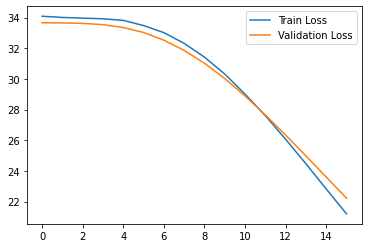

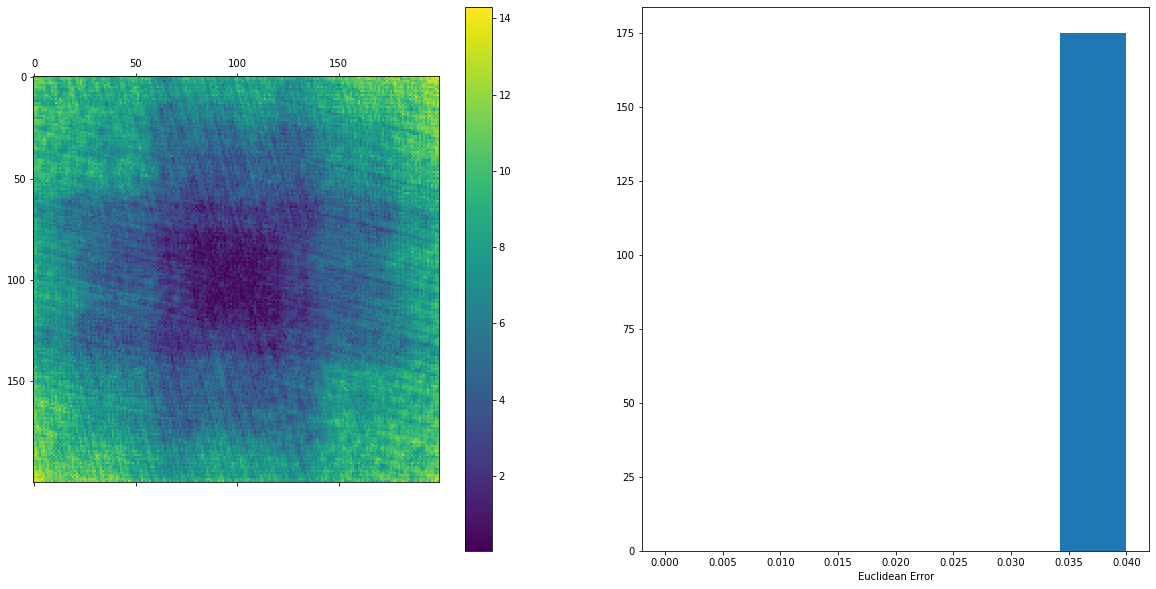

In [11]:
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()


plt.figure(figsize=(20,10))
pred_vals = predict(model, ns_test_samples, device)
pred_err = np.linalg.norm(pred_vals - test_samples, axis=1)

plt.subplot(1,2,1)
plt.matshow(pred_err.reshape((200,200)), fignum=False)
plt.colorbar()

plt.subplot(1,2,2)
plt.hist(pred_err, bins=np.linspace(0,0.04,8), density=True)
plt.xlabel('Euclidean Error')

plt.show()